In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/EDA project - 여행하소서/제출 파일/230821~230925.csv', index_col=0)
df = df.drop(columns=['응답자ID', '조사시작일자'])
df['가구소득정도명'] = df['가구소득정도명'].astype(int)

df.head()

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,중국여행관심값,일본여행관심값,홍콩마카오여행관심값,동남아시아여행관심값,중동서남아시아여행관심값,미국캐나다여행관심값,남미중남미여행관심값,서유럽북유럽여행관심값,동유럽여행관심값,남유럽여행관심값,남태평양여행관심값,아프리카여행관심값
0,F,60,서울특별시,2,3,3,1,1,3,4,3,4,1,2,5,1
1,F,60,서울특별시,3,2,3,3,3,3,4,3,4,3,3,4,2
2,F,60,서울특별시,2,1,2,3,3,3,3,3,3,3,3,3,3
3,F,60,서울특별시,2,2,2,3,4,2,3,4,3,4,4,4,3
4,F,60,서울특별시,2,3,3,3,4,4,4,4,4,3,4,3,3


<h3>1. 통계 분석</h3>
<h4>1) 기본 통계 정보</h4>

In [ ]:
df.describe()

,연령대구분명,가구소득정도명,중국여행관심값,일본여행관심값,홍콩마카오여행관심값,동남아시아여행관심값,중동서남아시아여행관심값,미국캐나다여행관심값,남미중남미여행관심값,서유럽북유럽여행관심값,동유럽여행관심값,남유럽여행관심값,남태평양여행관심값,아프리카여행관심값
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,41.438127,2.749833,2.077592,2.943813,2.858194,3.184615,2.377258,3.272241,2.671572,3.393311,3.206020,3.268896,3.399331,2.236789
std,13.826425,1.017398,0.998325,1.264615,0.999309,1.059491,1.054482,1.012703,1.035431,1.046679,1.068142,1.048331,1.002206,1.016654
min,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000
50%,40.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,50.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,60.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<h4>2) 범주형 데이터 빈도</h4>

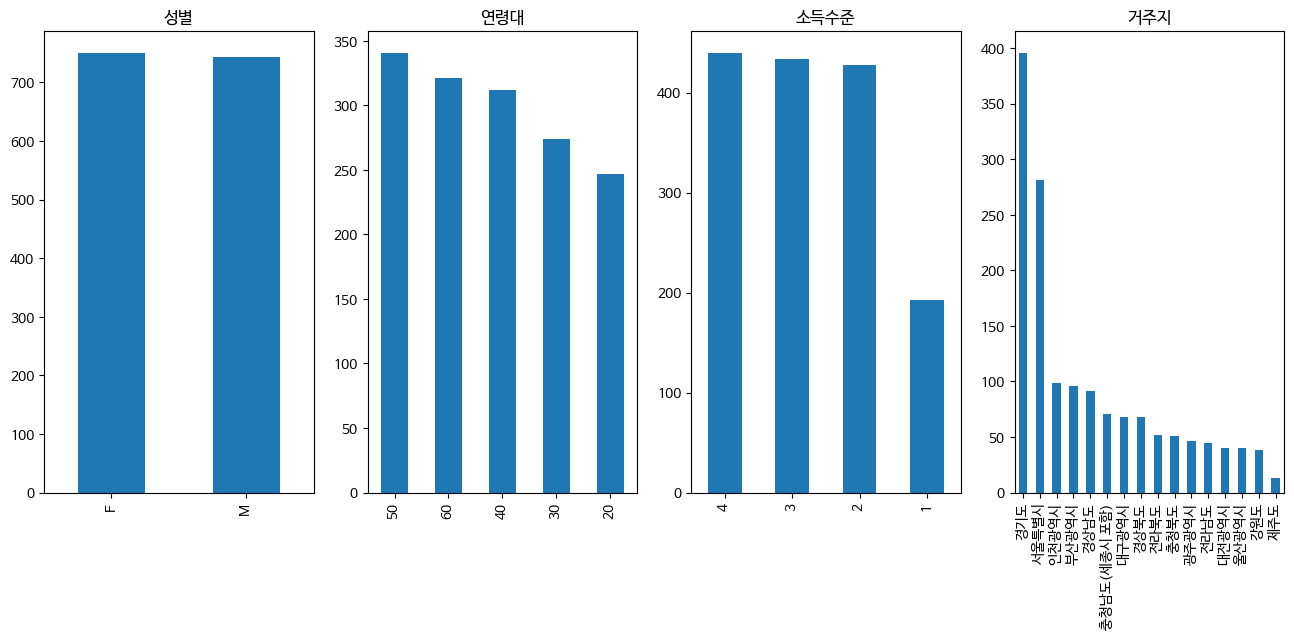

In [ ]:
plt.figure(figsize=(16, 6))

gender_counts = df['성별구분코드'].value_counts()
age_counts = df['연령대구분명'].value_counts()
area_counts = df['가구소득정도명'].value_counts()
income_counts = df['답변자거주지역명'].value_counts()

plt.subplot(141)
gender_counts.plot(kind='bar', title='성별')

plt.subplot(142)
age_counts.plot(kind='bar', title='연령대')

plt.subplot(143)
area_counts.plot(kind='bar', title='소득수준')

plt.subplot(144)
income_counts.plot(kind='bar', title='거주지')

plt.show()

3) 연령대 & 소득수준 간의 교차표

In [ ]:
age_income = pd.crosstab(df['연령대구분명'], df['가구소득정도명'])
age_income

가구소득정도명,1,2,3,4
연령대구분명,,,,
20,55,76,40,76
30,34,115,69,56
40,24,75,120,93
50,29,73,106,133
60,51,89,99,82


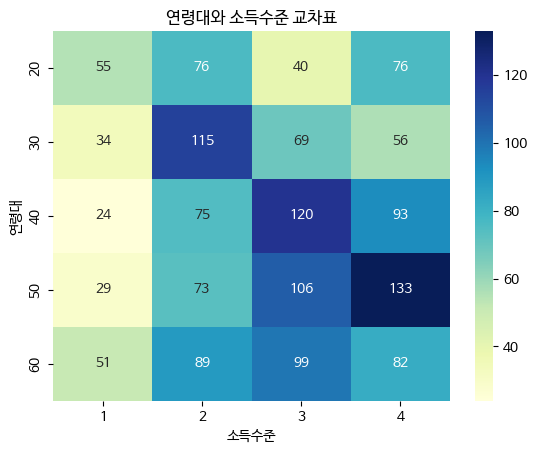

In [ ]:
sns.heatmap(age_income, annot=True, fmt='d', cmap='YlGnBu')  # annot=True로 셀에 숫자 표시, fmt='d'로 정수 형식으로 표시, cmap으로 색상 맵 설정

plt.xlabel('소득수준')
plt.ylabel('연령대')
plt.title('연령대와 소득수준 교차표')

plt.show()

<h3>2. 카테고리별 분석</h3>
<h4>1) 성별에 따른 지역별 관심도</h4>

In [ ]:
interest_cols = ['중국여행관심값', '일본여행관심값', '홍콩마카오여행관심값', '동남아시아여행관심값', '중동서남아시아여행관심값', '미국캐나다여행관심값', '남미중남미여행관심값', '서유럽북유럽여행관심값', '동유럽여행관심값', '남유럽여행관심값', '남태평양여행관심값', '아프리카여행관심값']

interest_by_sex = df.groupby('성별구분코드')[interest_cols].mean()
interest_by_sex

,중국여행관심값,일본여행관심값,홍콩마카오여행관심값,동남아시아여행관심값,중동서남아시아여행관심값,미국캐나다여행관심값,남미중남미여행관심값,서유럽북유럽여행관심값,동유럽여행관심값,남유럽여행관심값,남태평양여행관심값,아프리카여행관심값
성별구분코드,,,,,,,,,,,,
F,2.071904,2.820240,2.909454,3.207723,2.386152,3.302264,2.745672,3.474035,3.294274,3.372836,3.508655,2.312916
M,2.083333,3.068548,2.806452,3.161290,2.368280,3.241935,2.596774,3.311828,3.116935,3.163978,3.288978,2.159946


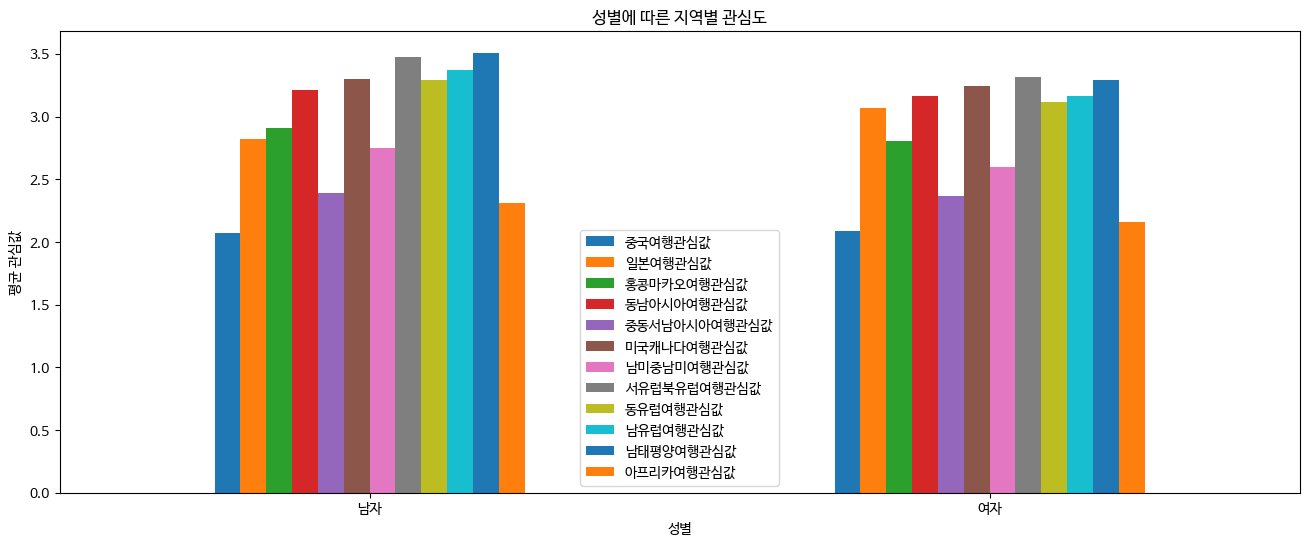

In [ ]:
ax = interest_by_sex.plot(kind='bar', figsize=(16, 6))

x_labels = ['남자', '여자']
ax.set_xticklabels(x_labels, rotation=0)

plt.title('성별에 따른 지역별 관심도')
plt.xlabel('성별')
plt.ylabel('평균 관심값')
plt.show()

<h4>2) 연령대에 따른 지역별 관심도</h4>

In [ ]:
interest_by_age = df.groupby('연령대구분명')[interest_cols].mean()
interest_by_age

,중국여행관심값,일본여행관심값,홍콩마카오여행관심값,동남아시아여행관심값,중동서남아시아여행관심값,미국캐나다여행관심값,남미중남미여행관심값,서유럽북유럽여행관심값,동유럽여행관심값,남유럽여행관심값,남태평양여행관심값,아프리카여행관심값
연령대구분명,,,,,,,,,,,,
20,2.174089,3.453441,2.983806,3.307692,2.396761,3.481781,2.728745,3.502024,3.259109,3.417004,3.574899,2.287449
30,1.828467,2.974453,2.927007,3.266423,2.153285,3.291971,2.489051,3.379562,3.164234,3.160584,3.445255,2.116788
40,1.967949,2.826923,2.919872,3.342949,2.282051,3.355769,2.625000,3.483974,3.237179,3.375000,3.512821,2.189103
50,2.099707,2.800587,2.782991,3.114370,2.457478,3.131965,2.683284,3.363636,3.243402,3.296188,3.325513,2.260997
60,2.299065,2.791277,2.722741,2.940810,2.560748,3.161994,2.816199,3.264798,3.130841,3.115265,3.193146,2.320872


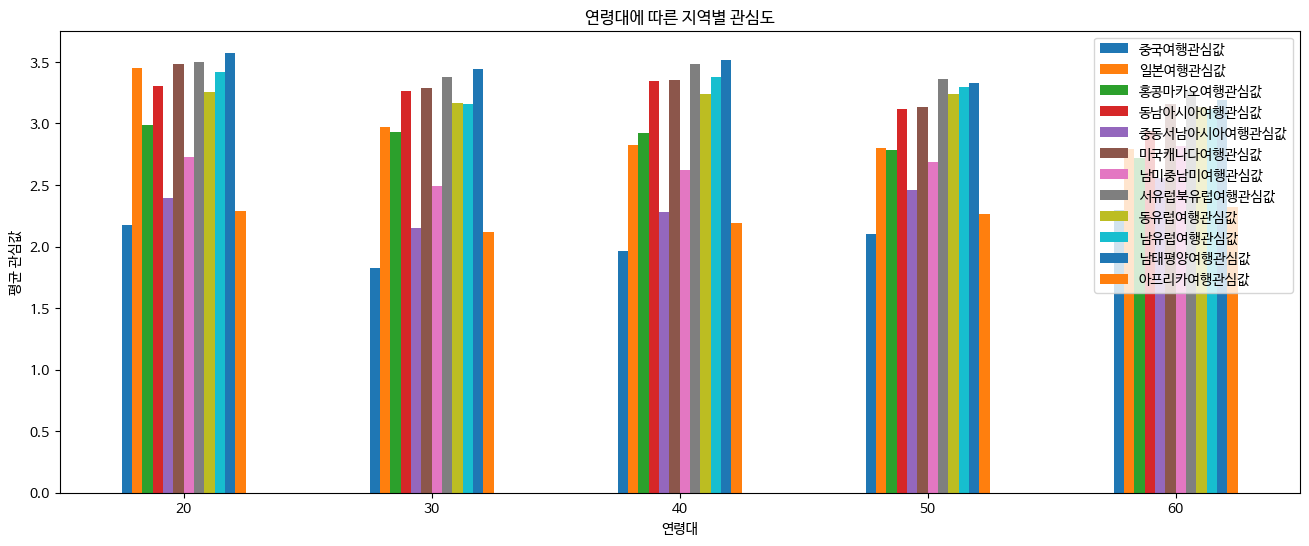

In [ ]:
ax = interest_by_age.plot(kind='bar', figsize=(16, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.title('연령대에 따른 지역별 관심도')
plt.xlabel('연령대')
plt.ylabel('평균 관심값')
plt.show()

<h4>3) 거주지에 따른 지역별 관심도</h4>

In [ ]:
interest_by_area = df.groupby('답변자거주지역명')[interest_cols].mean()
interest_by_area

,중국여행관심값,일본여행관심값,홍콩마카오여행관심값,동남아시아여행관심값,중동서남아시아여행관심값,미국캐나다여행관심값,남미중남미여행관심값,서유럽북유럽여행관심값,동유럽여행관심값,남유럽여행관심값,남태평양여행관심값,아프리카여행관심값
답변자거주지역명,,,,,,,,,,,,
강원도,2.236842,2.815789,2.921053,3.210526,2.447368,3.315789,2.815789,3.342105,3.026316,3.263158,3.394737,2.368421
경기도,1.964646,2.962121,2.840909,3.174242,2.260101,3.343434,2.638889,3.472222,3.265152,3.282828,3.431818,2.176768
경상남도,2.175824,2.824176,2.967033,3.307692,2.417582,3.120879,2.714286,3.318681,3.032967,3.186813,3.384615,2.131868
경상북도,2.073529,3.058824,2.750000,3.147059,2.323529,3.058824,2.617647,3.220588,3.000000,3.073529,3.308824,2.058824
광주광역시,2.260870,2.652174,2.869565,3.000000,2.304348,3.239130,2.543478,3.173913,3.260870,3.065217,3.239130,2.282609
대구광역시,2.191176,2.911765,2.867647,3.132353,2.426471,3.147059,2.632353,3.308824,3.029412,3.044118,3.397059,2.264706
대전광역시,2.175000,3.300000,3.125000,3.450000,2.750000,3.650000,3.050000,3.550000,3.425000,3.625000,3.675000,2.525000
부산광역시,2.270833,3.062500,3.000000,3.270833,2.427083,3.322917,2.791667,3.427083,3.218750,3.281250,3.447917,2.187500
서울특별시,2.088968,2.918149,2.811388,3.192171,2.380783,3.284698,2.718861,3.462633,3.284698,3.366548,3.359431,2.295374


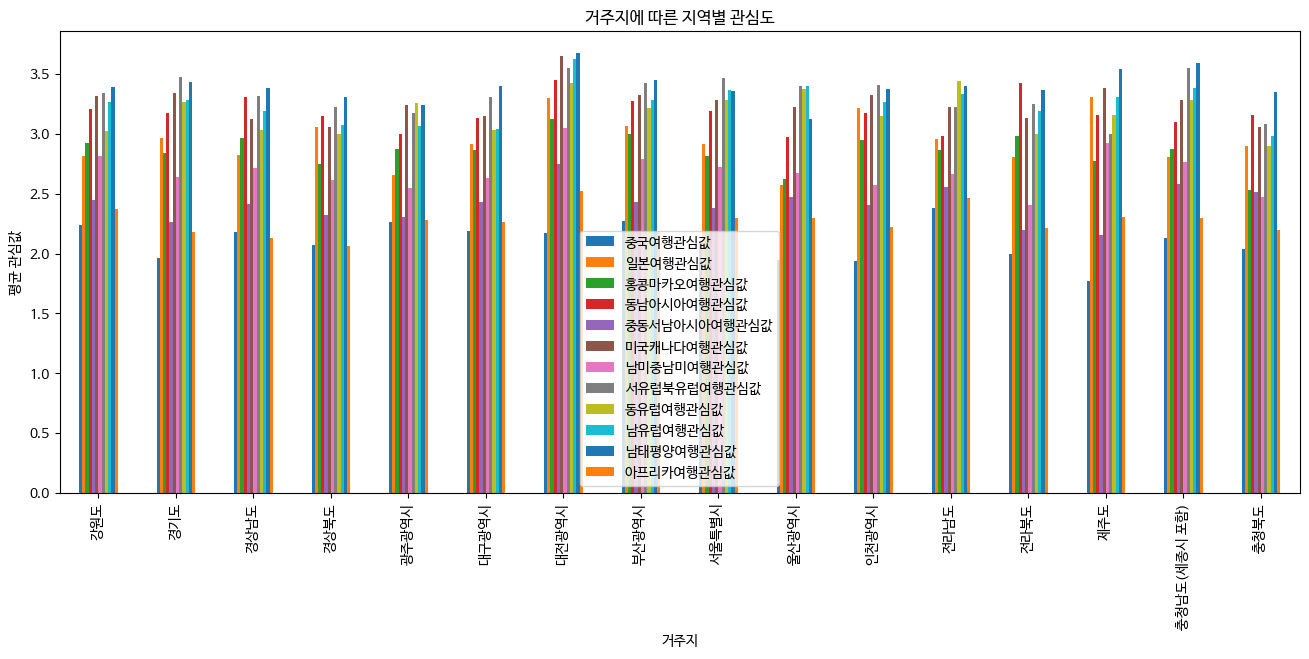

In [ ]:
ax = interest_by_area.plot(kind='bar', figsize=(16, 6))

plt.title('거주지에 따른 지역별 관심도')
plt.xlabel('거주지')
plt.ylabel('평균 관심값')
plt.show()

<h4>4) 소득수준에 따른 지역별 관심도</h4>

In [ ]:
interest_by_income = df.groupby('가구소득정도명')[interest_cols].mean()
interest_by_income

,중국여행관심값,일본여행관심값,홍콩마카오여행관심값,동남아시아여행관심값,중동서남아시아여행관심값,미국캐나다여행관심값,남미중남미여행관심값,서유럽북유럽여행관심값,동유럽여행관심값,남유럽여행관심값,남태평양여행관심값,아프리카여행관심값
가구소득정도명,,,,,,,,,,,,
1,2.165803,2.896373,2.880829,3.015544,2.331606,3.176166,2.626943,3.295337,3.119171,3.165803,3.243523,2.150259
2,2.070093,2.906542,2.852804,3.175234,2.331776,3.240654,2.661215,3.268692,3.093458,3.198598,3.329439,2.217290
3,2.071429,2.847926,2.801843,3.198157,2.373272,3.193548,2.645161,3.407834,3.232719,3.248848,3.377880,2.216590
4,2.052273,3.095455,2.909091,3.254545,2.445455,3.422727,2.727273,3.543182,3.327273,3.402273,3.556818,2.313636


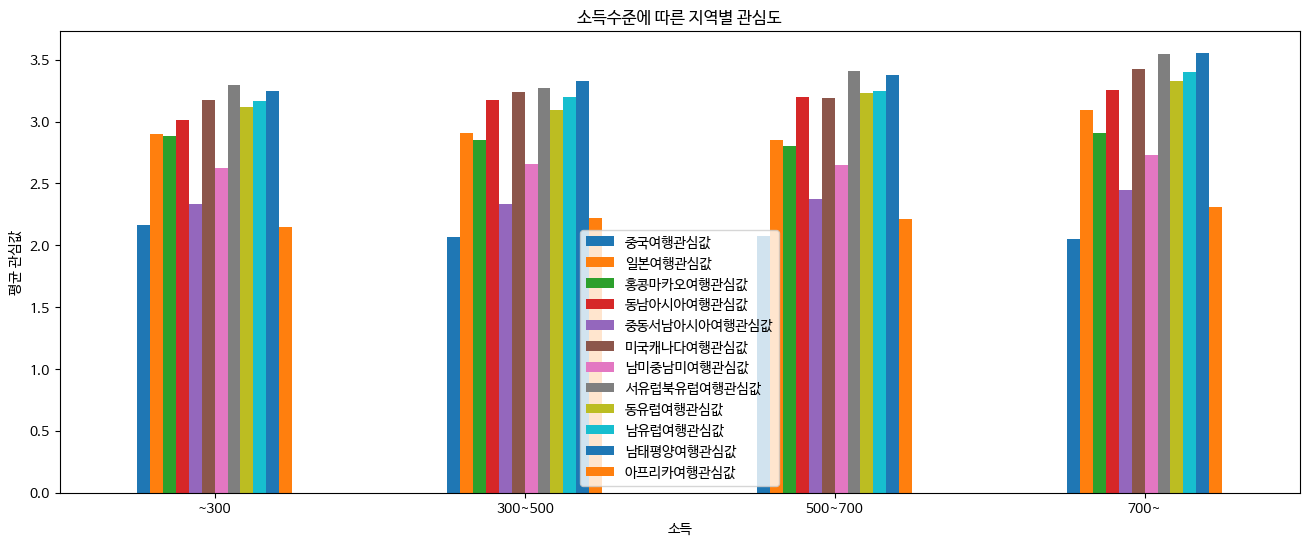

In [ ]:
ax = interest_by_income.plot(kind='bar', figsize=(16, 6))

x_labels = ['~300', '300~500', '500~700', '700~']
ax.set_xticklabels(x_labels, rotation=0)

plt.title('소득수준에 따른 지역별 관심도')
plt.xlabel('소득')
plt.ylabel('평균 관심값')
plt.show()

<h3>3. 피처 간 상관관계</h3>
<h4>1) 상관관계 히트맵</h4>

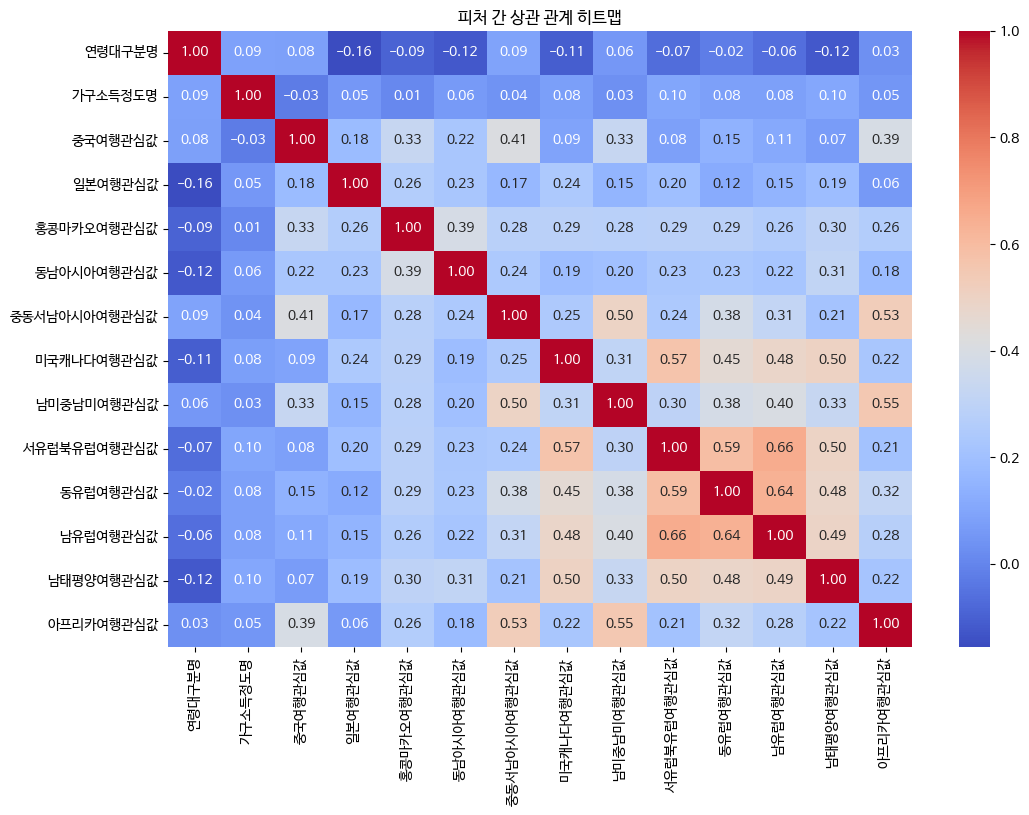

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('피처 간 상관 관계 히트맵')
plt.show()

<p>대부분의 변수 사이에 약한 상관관계를 보이거나 상관관계가 거의 존재하지 않았다.</p>
<p>그 중에서 남유럽과 서유럽 사이에서 0.61, 동유럽과 서유럽 사이에서 0.58, 아프리카와 중동 사이에서 0.58, 남유럽과 동유럽 사이에서 0.57, 남유럽과 북미 사이에서 0.56, 서유럽과 북미 사이에서 0.54, 남미, 중남미와 중동사이에서 0.51의 양의 상관관계를 보였다.</p>
<b>한국으로부터의 거리가 먼 국가들에 대한 관심도 변수 사이에서 상관관계가 존재하는 것으로 보임.</b>

<h4>2) 독립성 검정</h4>

In [ ]:
df_list = df.loc[:, '성별구분코드':'가구소득정도명']
df_list

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명
0,F,60,서울특별시,2
1,F,60,서울특별시,3
2,F,60,서울특별시,2
3,F,60,서울특별시,2
4,F,60,서울특별시,2
...,...,...,...,...
1490,F,50,강원도,3
1491,M,40,경기도,3
1492,F,40,전라북도,3
1493,F,60,경기도,3


In [ ]:
import scipy.stats as stats

result = pd.crosstab(df_list['성별구분코드'], df_list['연령대구분명'])
stats.chi2_contingency(observed = result)

Chi2ContingencyResult(statistic=1.0051857682886924, pvalue=0.9090086409103427, dof=4, expected_freq=array([[124.07826087, 137.64147157, 156.73043478, 171.29832776,
        161.25150502],
       [122.92173913, 136.35852843, 155.26956522, 169.70167224,
        159.74849498]]))

In [ ]:
result = pd.crosstab(df_list['성별구분코드'], df_list['답변자거주지역명'])
stats.chi2_contingency(observed = result)

Chi2ContingencyResult(statistic=18.289798970967944, pvalue=0.24773660527042135, dof=15, expected_freq=array([[ 19.08896321, 198.9270903 ,  45.71304348,  34.15919732,
         23.10769231,  34.15919732,  20.09364548,  48.22474916,
        141.15785953,  20.09364548,  49.73177258,  22.60535117,
         26.12173913,   6.53043478,  35.66622074,  25.61939799],
       [ 18.91103679, 197.0729097 ,  45.28695652,  33.84080268,
         22.89230769,  33.84080268,  19.90635452,  47.77525084,
        139.84214047,  19.90635452,  49.26822742,  22.39464883,
         25.87826087,   6.46956522,  35.33377926,  25.38060201]]))

In [ ]:
result = pd.crosstab(df_list['성별구분코드'], df_list['가구소득정도명'])
stats.chi2_contingency(observed = result)

Chi2ContingencyResult(statistic=10.024859225467623, pvalue=0.0183560005856863, dof=3, expected_freq=array([[ 96.95183946, 215.00200669, 218.01605351, 221.03010033],
       [ 96.04816054, 212.99799331, 215.98394649, 218.96989967]]))

In [ ]:
result = pd.crosstab(df_list['연령대구분명'], df_list['답변자거주지역명'])
stats.chi2_contingency(observed = result)

Chi2ContingencyResult(statistic=57.27230955694853, pvalue=0.5760272614488324, dof=60, expected_freq=array([[ 6.27826087, 65.42608696, 15.03478261, 11.23478261,  7.6       ,
        11.23478261,  6.60869565, 15.86086957, 46.42608696,  6.60869565,
        16.35652174,  7.43478261,  8.59130435,  2.14782609, 11.73043478,
         8.42608696],
       [ 6.96454849, 72.57792642, 16.67826087, 12.46287625,  8.43076923,
        12.46287625,  7.33110368, 17.59464883, 51.50100334,  7.33110368,
        18.14448161,  8.24749164,  9.53043478,  2.3826087 , 13.01270903,
         9.34715719],
       [ 7.93043478, 82.64347826, 18.99130435, 14.19130435,  9.6       ,
        14.19130435,  8.34782609, 20.03478261, 58.64347826,  8.34782609,
        20.66086957,  9.39130435, 10.85217391,  2.71304348, 14.8173913 ,
        10.64347826],
       [ 8.66755853, 90.32508361, 20.75652174, 15.51036789, 10.49230769,
        15.51036789,  9.12374582, 21.89698997, 64.09431438,  9.12374582,
        22.5812709 , 10.2642140

In [ ]:
result = pd.crosstab(df_list['연령대구분명'], df_list['가구소득정도명'])
stats.chi2_contingency(observed = result)

Chi2ContingencyResult(statistic=102.53917896117827, pvalue=1.7685377920800112e-16, dof=12, expected_freq=array([[ 31.88695652,  70.71304348,  71.70434783,  72.69565217],
       [ 35.37257525,  78.44280936,  79.54247492,  80.64214047],
       [ 40.27826087,  89.32173913,  90.57391304,  91.82608696],
       [ 44.02207358,  97.62408027,  98.99264214, 100.36120401],
       [ 41.44013378,  91.89832776,  93.18662207,  94.47491639]]))

In [ ]:
result = pd.crosstab(df_list['답변자거주지역명'], df_list['가구소득정도명'])
stats.chi2_contingency(observed = result)

Chi2ContingencyResult(statistic=69.73234680172065, pvalue=0.010482224585912836, dof=45, expected_freq=array([[  4.90568562,  10.87892977,  11.03143813,  11.18394649],
       [ 51.12240803, 113.36989967, 114.95919732, 116.54849498],
       [ 11.74782609,  26.05217391,  26.4173913 ,  26.7826087 ],
       [  8.77859532,  19.46755853,  19.74046823,  20.01337793],
       [  5.93846154,  13.16923077,  13.35384615,  13.53846154],
       [  8.77859532,  19.46755853,  19.74046823,  20.01337793],
       [  5.1638796 ,  11.45150502,  11.61204013,  11.77257525],
       [ 12.39331104,  27.48361204,  27.86889632,  28.2541806 ],
       [ 36.27625418,  80.44682274,  81.57458194,  82.70234114],
       [  5.1638796 ,  11.45150502,  11.61204013,  11.77257525],
       [ 12.78060201,  28.34247492,  28.73979933,  29.13712375],
       [  5.80936455,  12.88294314,  13.06354515,  13.24414716],
       [  6.71304348,  14.88695652,  15.09565217,  15.30434783],
       [  1.67826087,   3.72173913,   3.77391304,   3

<h3>4. 응답자 특성 피처에 따른 분포</h3>
<h4>1) 소득수준별 분포</h4>

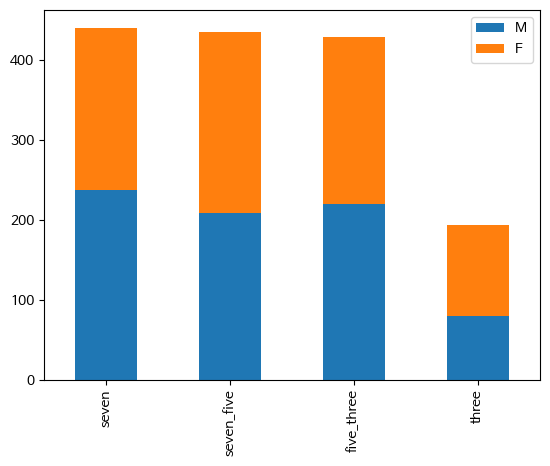

In [ ]:
def Dgree_chart(feature):
  seven = df_list[df_list['가구소득정도명']==4][feature].value_counts()
  seven_five = df_list[df_list['가구소득정도명']==3][feature].value_counts()
  five_three = df_list[df_list['가구소득정도명']==2][feature].value_counts()
  three = df_list[df_list['가구소득정도명']==1][feature].value_counts()
  df = pd.DataFrame([seven,seven_five, five_three, three])
  df.index = ['seven','seven_five', 'five_three', 'three']
  df.plot(kind='bar',stacked=True)

Dgree_chart('성별구분코드')

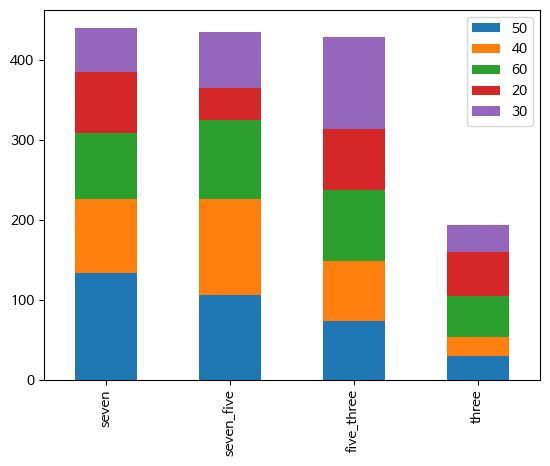

In [ ]:
Dgree_chart('연령대구분명')

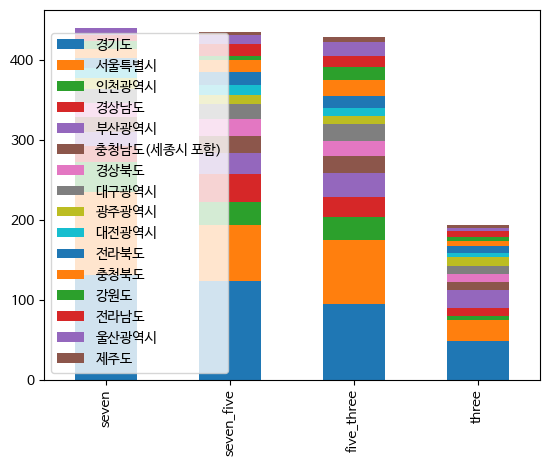

In [ ]:
Dgree_chart('답변자거주지역명')

<h4>2) 기타 분포</h4>

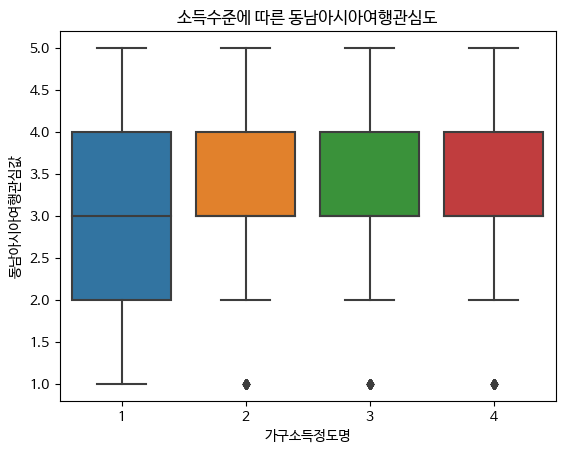

In [ ]:
sns.boxplot(x='가구소득정도명', y='동남아시아여행관심값', data=df)
plt.title('소득수준에 따른 동남아시아여행관심도')
plt.show()

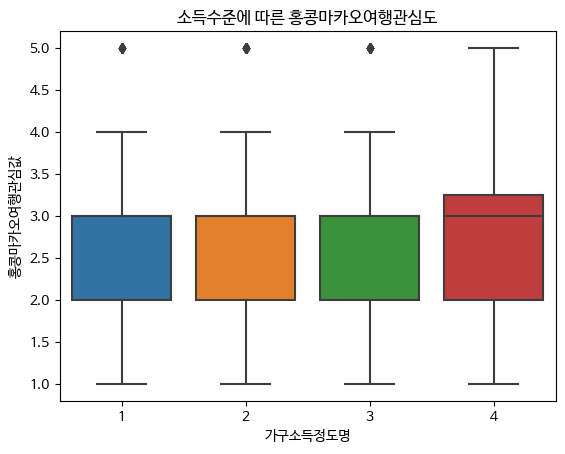

In [ ]:
sns.boxplot(x='가구소득정도명', y='홍콩마카오여행관심값', data=df)
plt.title('소득수준에 따른 홍콩마카오여행관심도')
plt.show()

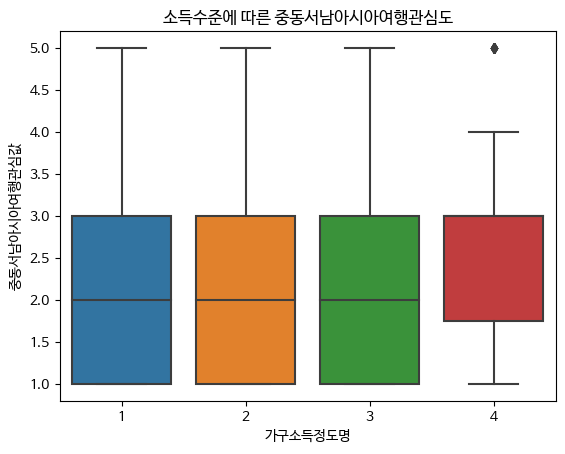

In [ ]:
sns.boxplot(x='가구소득정도명', y='중동서남아시아여행관심값', data=df)
plt.title('소득수준에 따른 중동서남아시아여행관심도')
plt.show()

In [ ]:
unique_areas = df['답변자거주지역명'].unique()
unique_areas

array(['서울특별시', '경기도', '대구광역시', '전라남도', '충청북도', '전라북도', '부산광역시', '대전광역시',
       '울산광역시', '광주광역시', '경상남도', '경상북도', '충청남도(세종시 포함)', '제주도', '인천광역시',
       '강원도'], dtype=object)

In [ ]:
# 열 지정
columns_to_plot = [
    '중국여행관심값',	'일본여행관심값',
    '홍콩마카오여행관심값',	'동남아시아여행관심값',
    '중동서남아시아여행관심값',	'미국캐나다여행관심값',
    '남미중남미여행관심값',	'서유럽북유럽여행관심값',
    '동유럽여행관심값', '남유럽여행관심값',
    '남태평양여행관심값',	'아프리카여행관심값'
]

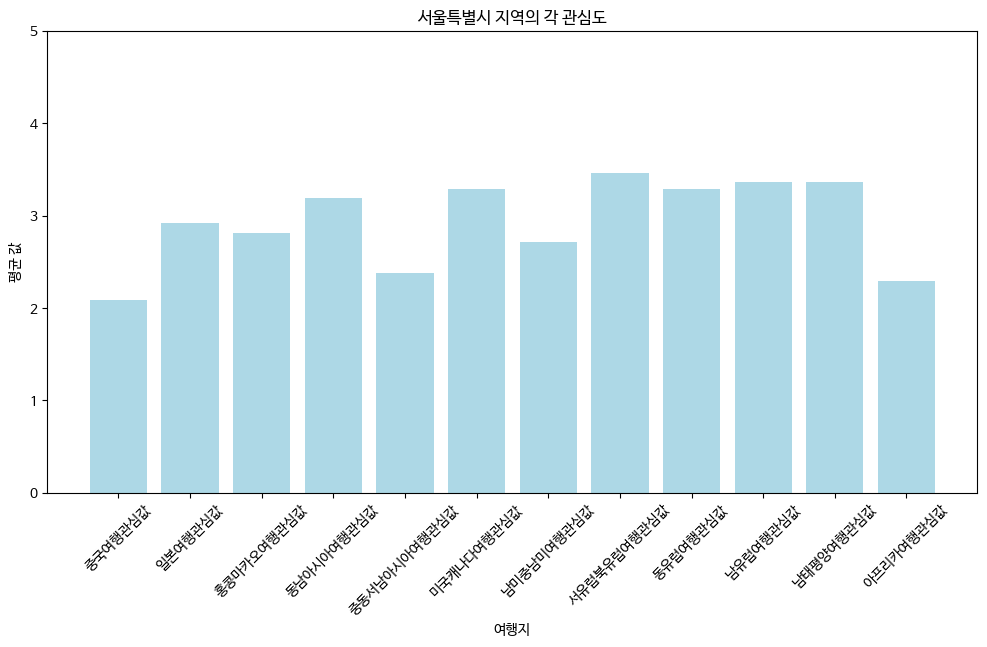

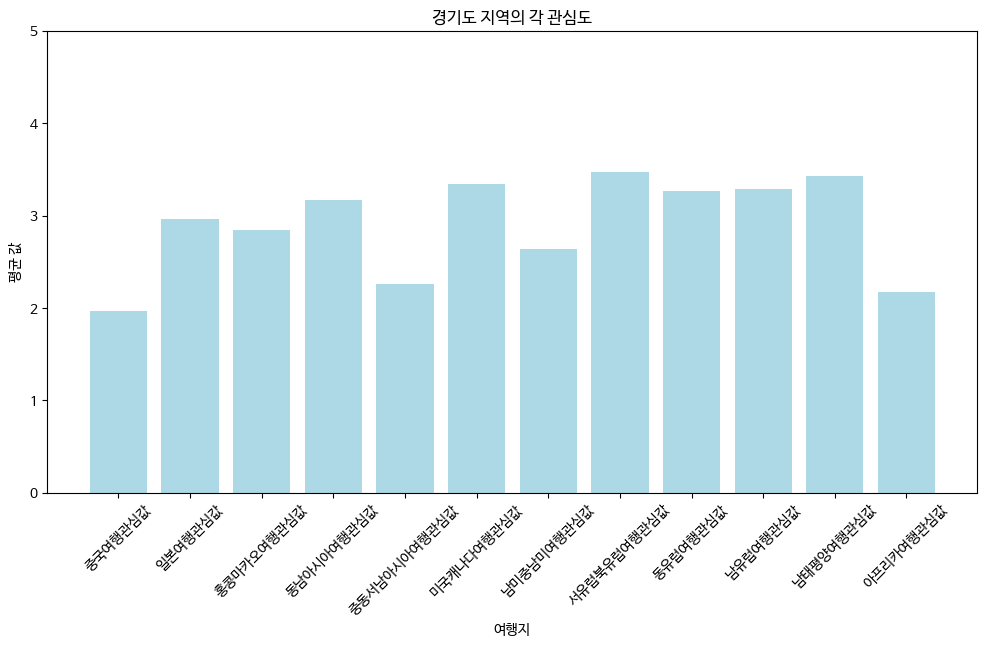

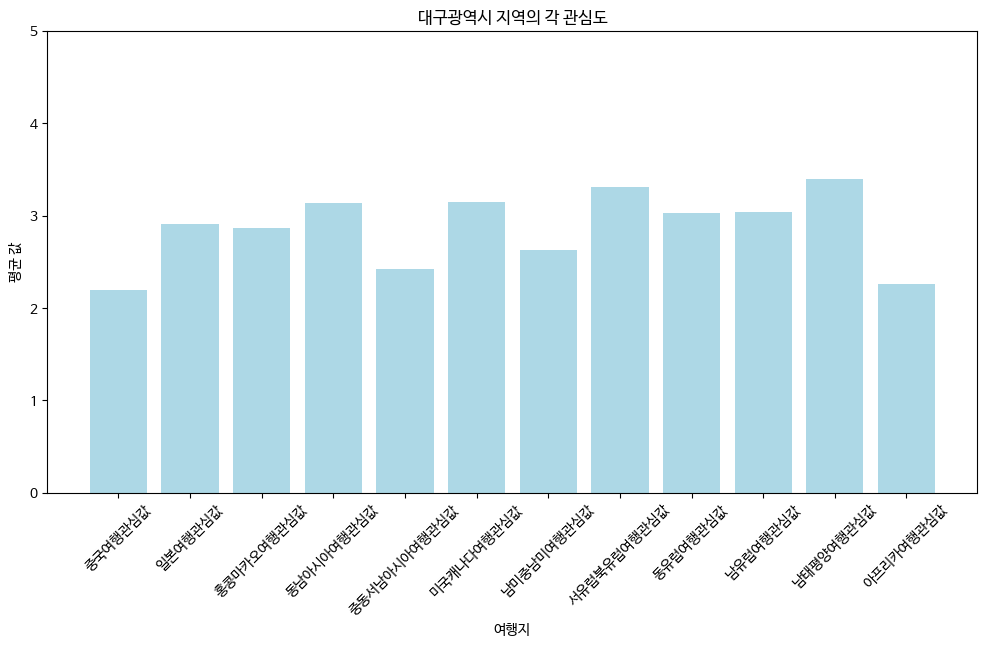

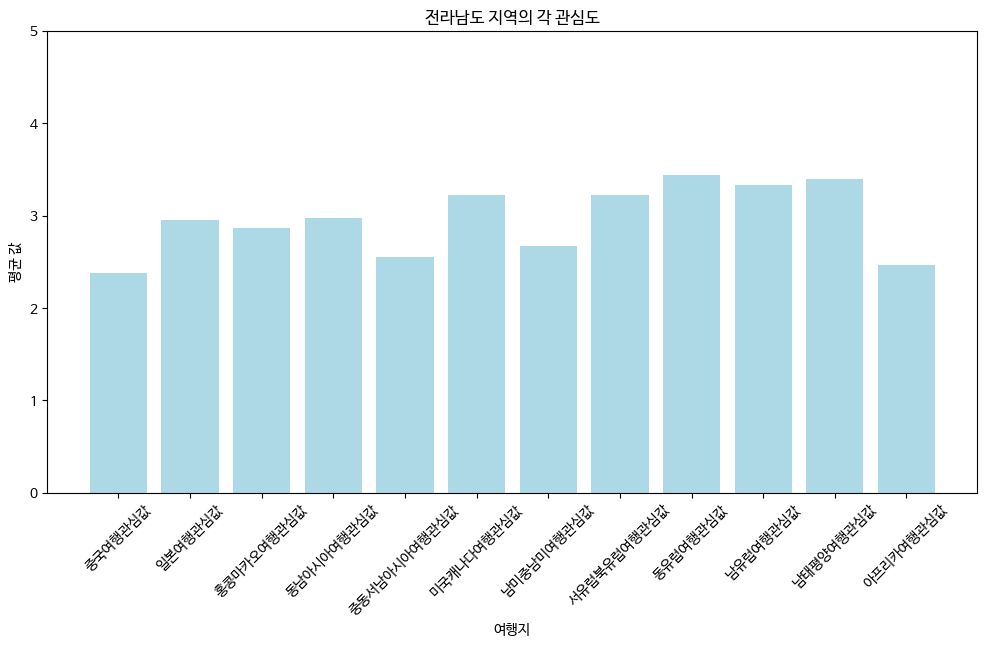

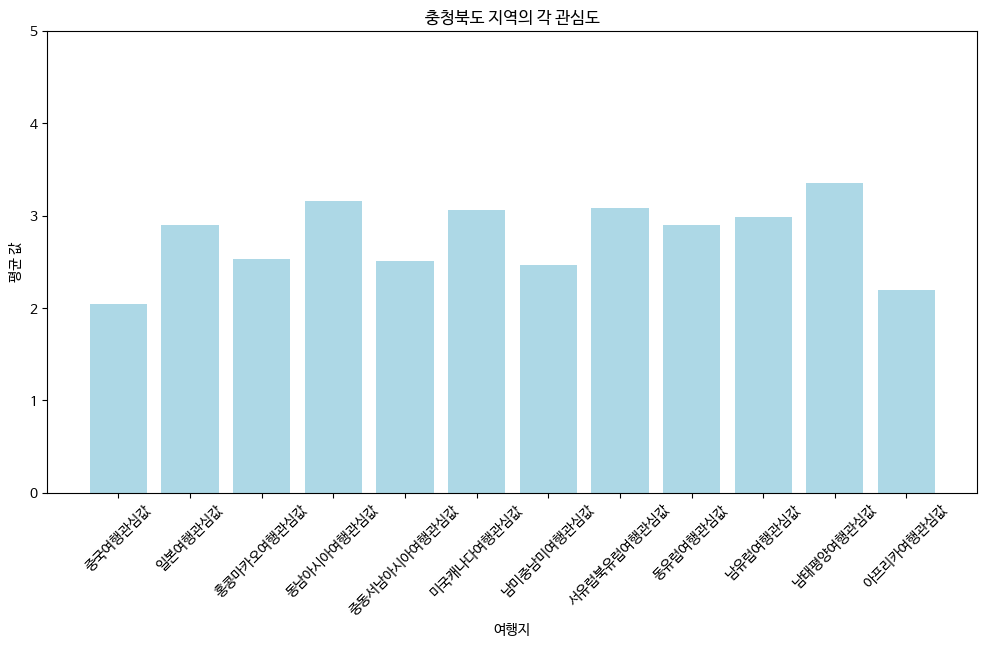

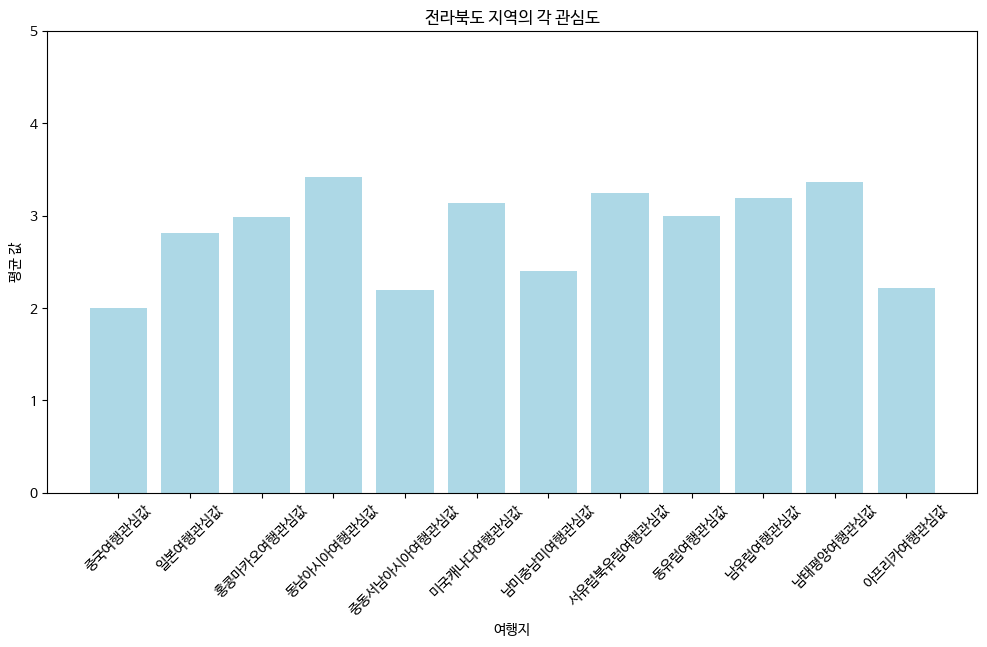

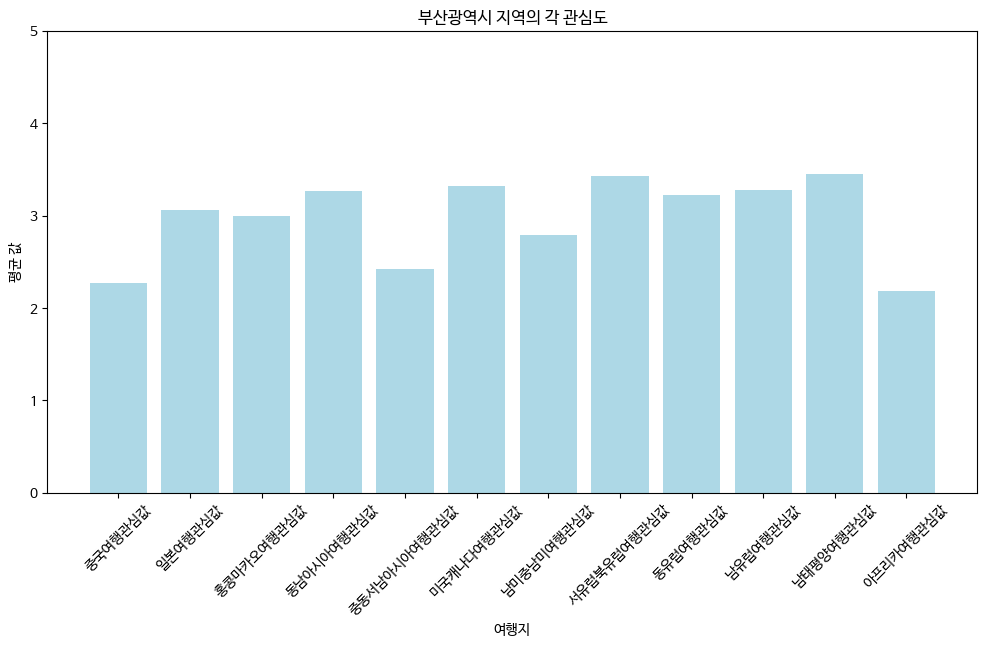

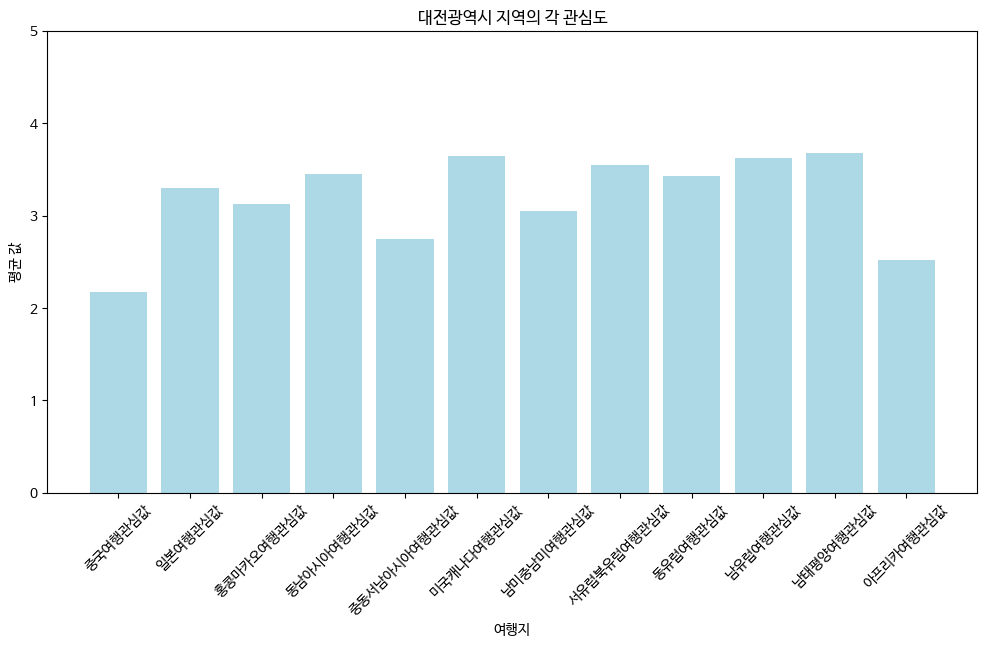

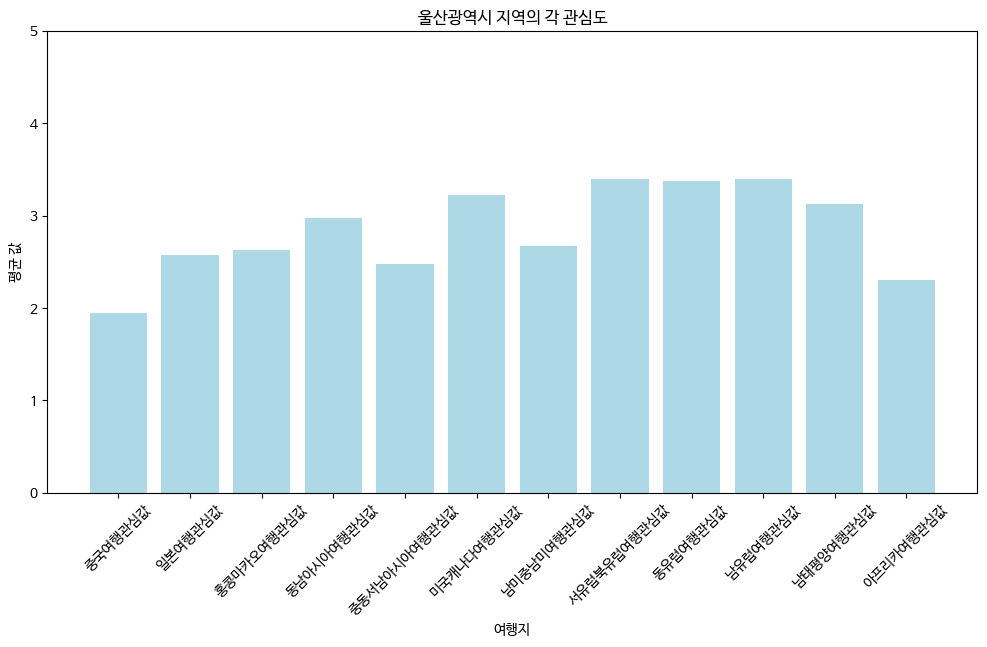

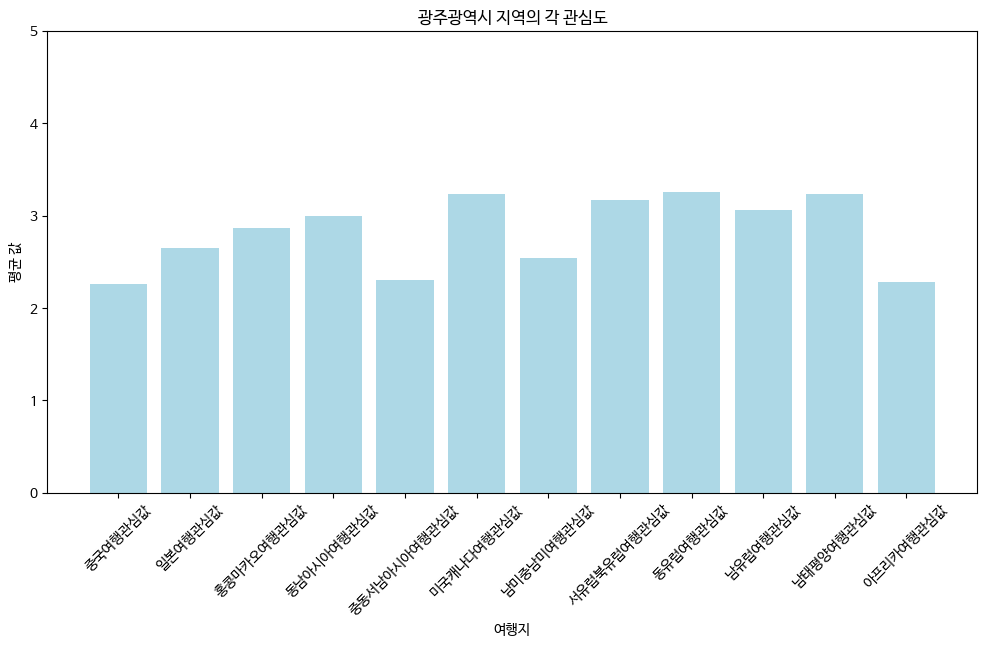

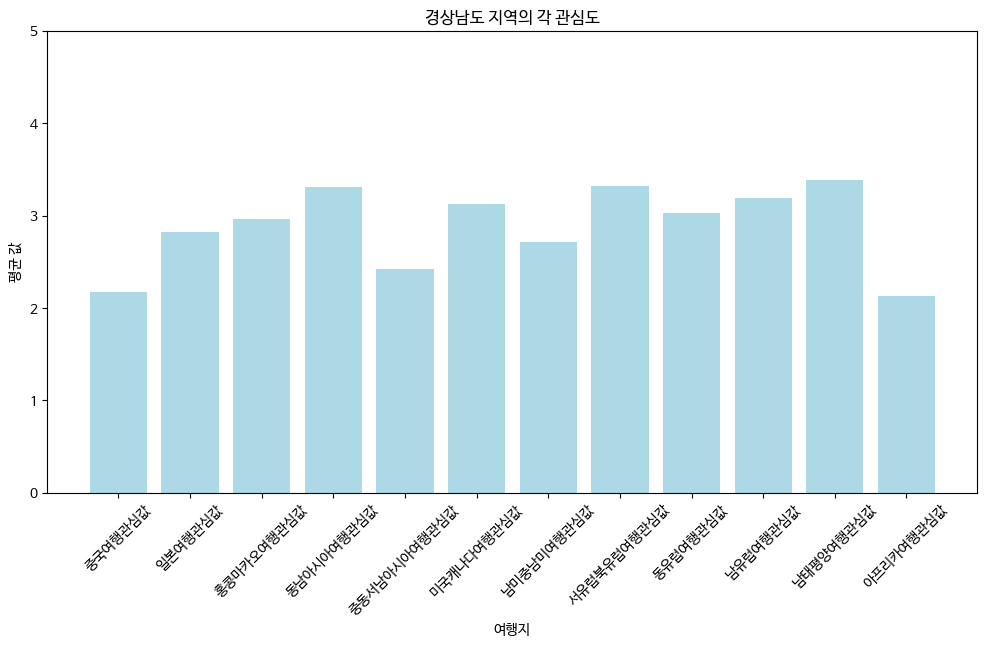

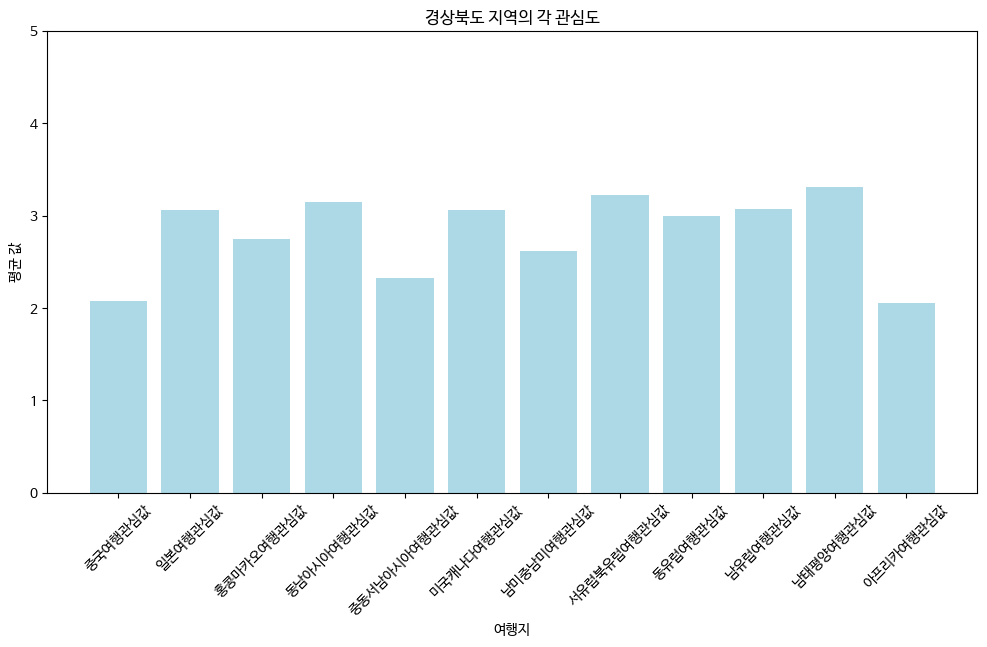

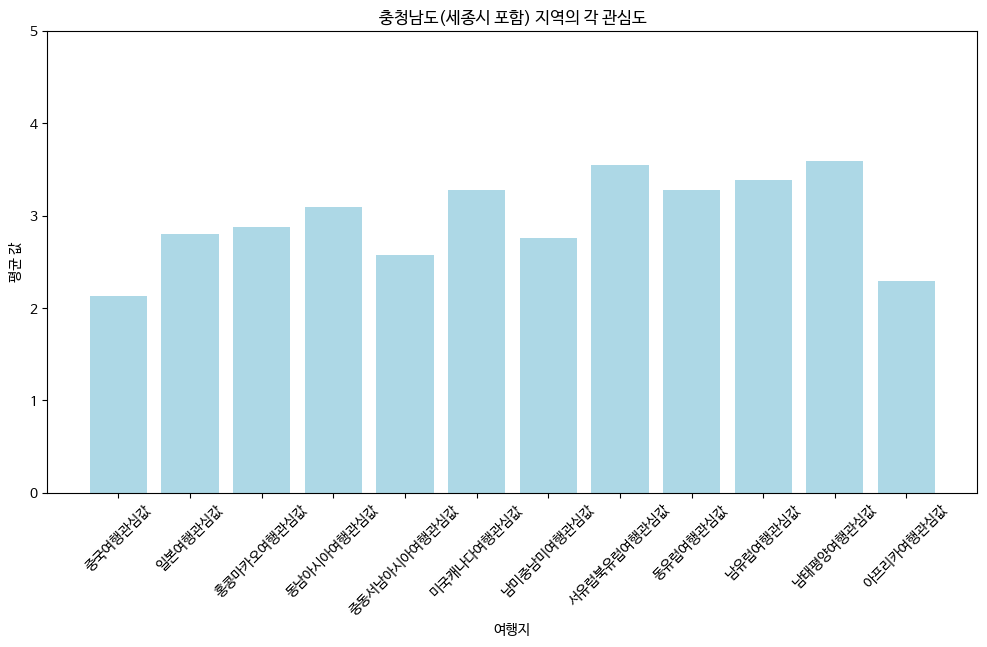

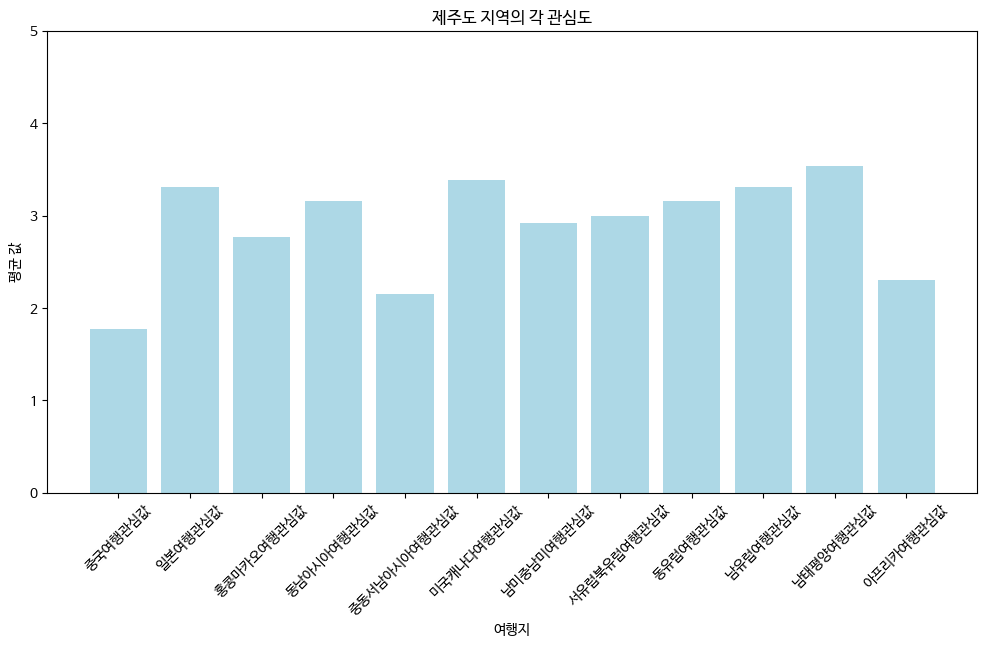

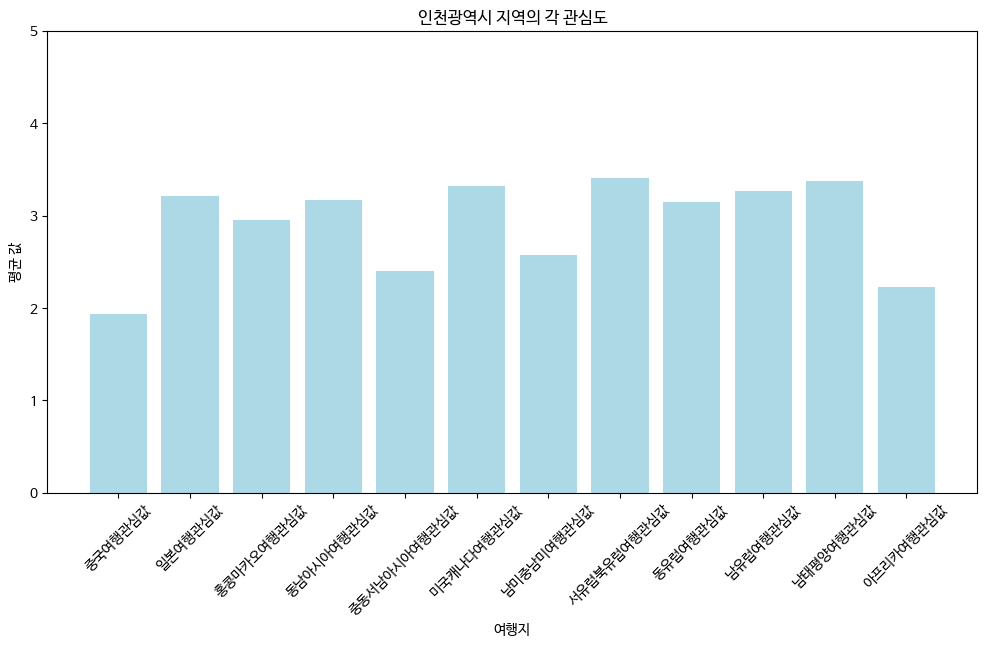

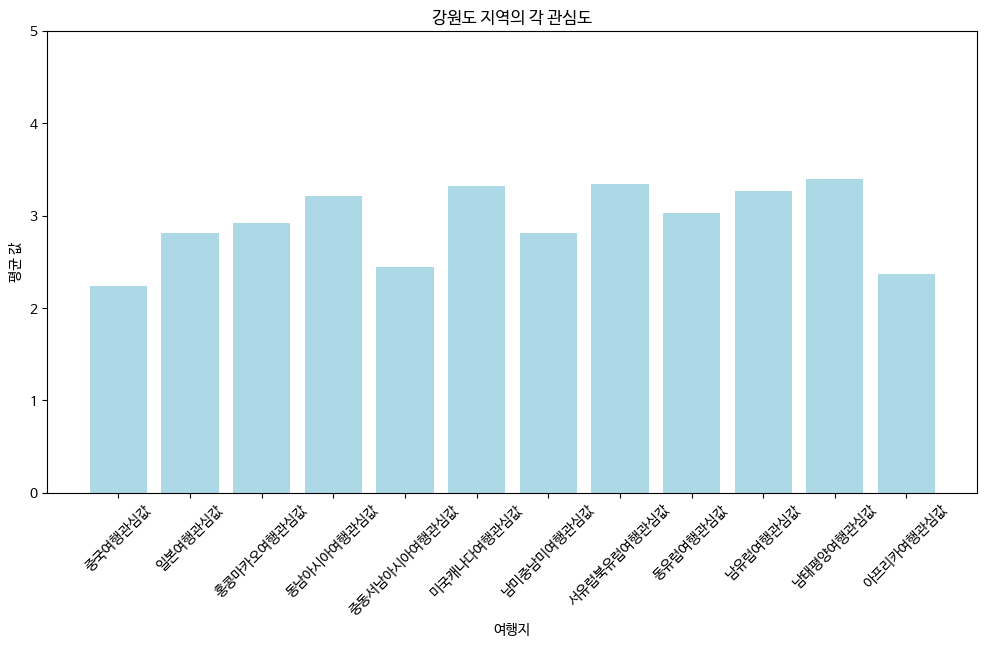

In [ ]:
for area in unique_areas:
    area_data = df[df['답변자거주지역명'] == area]

    values = area_data[columns_to_plot].mean()

    plt.figure(figsize=(12, 6))

    # 가장 큰 값을 가지는 열 인덱스 찾기
    max_column_index = values.idxmax()

    # 막대 색상 설정
    colors = ['pink' if i == max_column_index else 'lightblue' for i in range(len(columns_to_plot))]

    plt.bar(columns_to_plot, values, color=colors)
    plt.xlabel('여행지')
    plt.ylabel('평균 값')
    plt.title(f'{area} 지역의 각 관심도')

    # Y 레이블 범위 설정
    plt.ylim(0, 5)

    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# 'HSHLD_INCOME_DGREE_NM' 열의 값 추출
unique_income_degrees = df['가구소득정도명'].unique()
unique_income_degrees = sorted(unique_income_degrees)

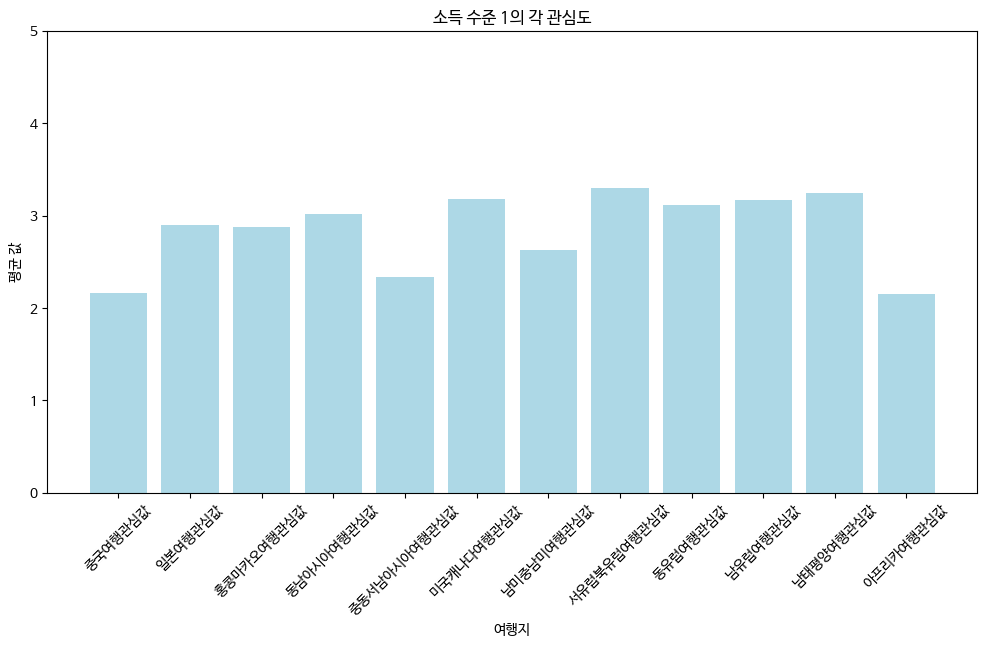

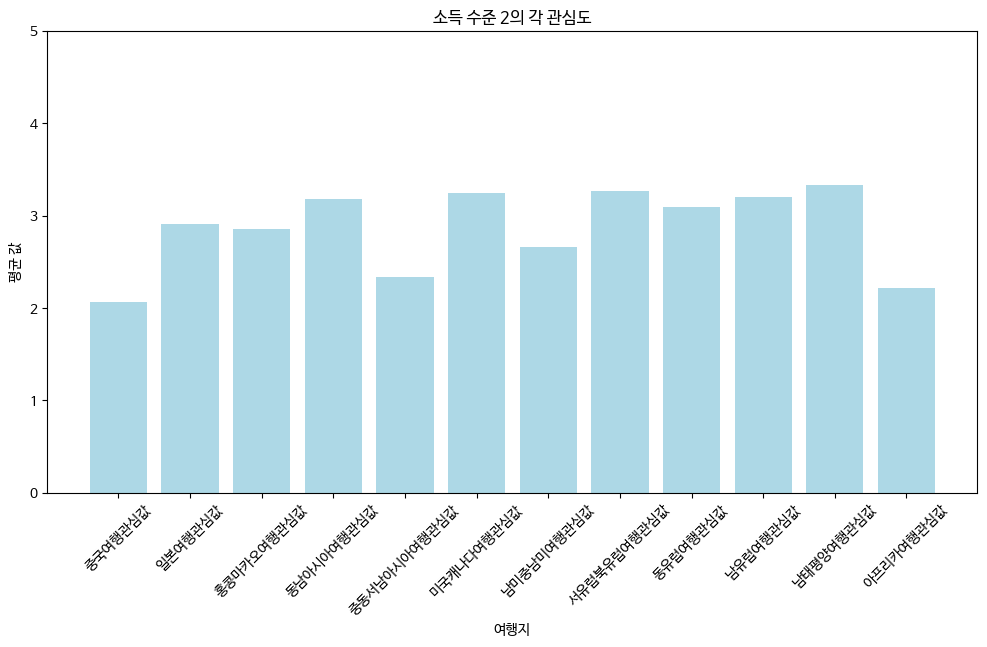

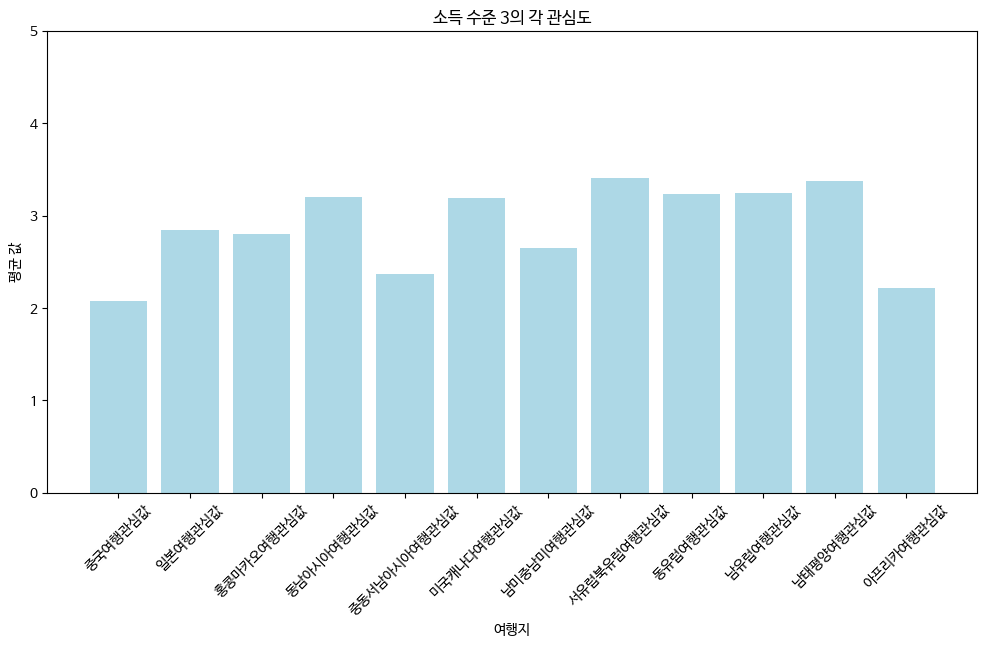

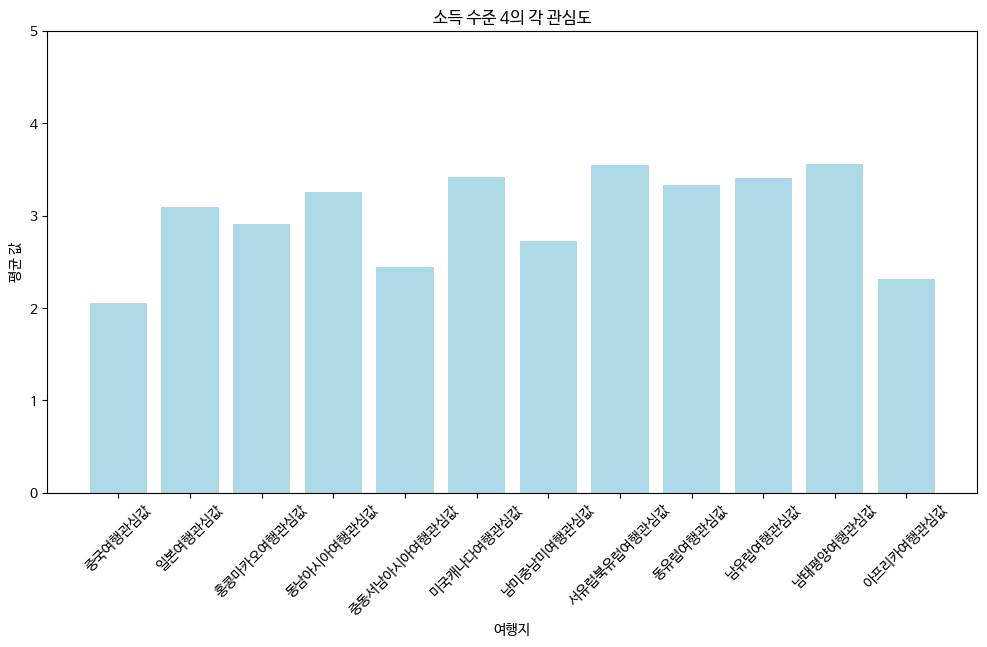

In [ ]:
for income_degree in unique_income_degrees:
    income_data = df[df['가구소득정도명'] == income_degree]

    # 각 그룹에 대해 열들의 평균 계산
    income_means = income_data[columns_to_plot].mean()

    plt.figure(figsize=(12, 6))
    plt.bar(columns_to_plot, income_means, color='lightblue')
    plt.xlabel('여행지')
    plt.ylabel('평균 값')
    plt.title(f'소득 수준 {int(income_degree)}의 각 관심도')

    # Y 레이블 범위 설정
    plt.ylim(0, 5)

    plt.xticks(rotation=45)
    plt.show()

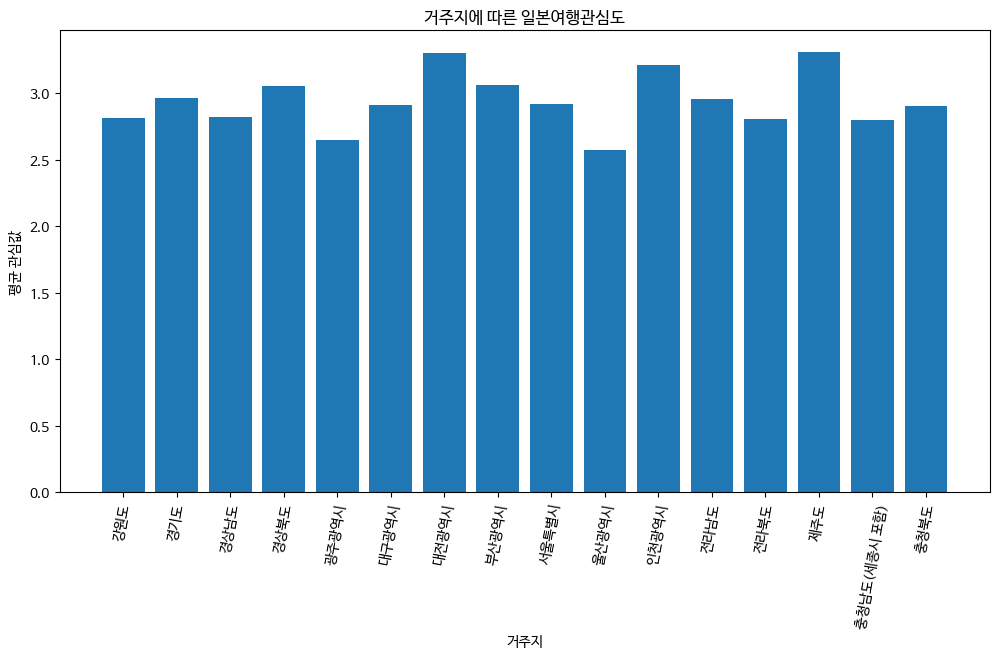

In [ ]:
grouped_by_area = df.groupby('답변자거주지역명')['일본여행관심값'].mean()
areas = grouped_by_area.index
interest_scores = grouped_by_area.values

plt.figure(figsize=(12, 6))

plt.bar(areas, interest_scores)
plt.title('거주지에 따른 일본여행관심도')
plt.xlabel('거주지')
plt.ylabel('평균 관심값')
plt.xticks(rotation=80)
plt.show()

<h3>4. 피벗 테이블</h3>
<h4>1) 응답자 특성 피처를 인덱스로 한 피벗 테이블</h4>


In [ ]:
pivot_table = df.pivot_table(index=['성별구분코드', '연령대구분명', '답변자거주지역명', '가구소득정도명'], values=interest_cols)
pivot_table

남미중남미여행관심값  남유럽여행관심값  남태평양여행관심값  \
성별구분코드 연령대구분명 답변자거주지역명     가구소득정도명                                    
F      20     강원도          1          2.000000  3.000000   3.000000   
                           2          2.500000  3.500000   3.000000   
              경기도          1          2.600000  3.000000   3.800000   
                           2          3.090909  3.272727   4.090909   
                           3          3.000000  3.571429   4.142857   
...                                        ...       ...        ...   
M      60     전라북도         4          3.000000  3.500000   3.500000   
              충청남도(세종시 포함) 2          2.500000  3.500000   3.500000   
                           4          3.000000  4.000000   4.000000   
              충청북도         2          2.000000  3.333333   3.000000   
                           3          1.500000  3.000000   3.000000   

                                    동남아시아여행관심값  동유럽여행관심값  미국캐나다여행관심값  \
성별구분코드 연령대구분명 답변자거주지역명     가구소득정도명                                     
F      20     강원도          1          4.000000  3.000000    4.000000   
                           2          4.000000  4.000000    3.500000   
              경기도          1          3.600000  3.400000    4.000000   
                           2          2.909091  3.181818    3.727273   
                           3          3.857143  3.571429    3.142857   
...                                        ...       ...         ...   
M      60     전라북도         4          3.500000  3.500000    3.500000   
              충청남도(세종시 포함) 2          3.000000  2.500000    3.000000   
                           4          5.000000  4.000000    3.000000   
              충청북도         2          3.000000  3.000000    2.666667   
                           3          4.000000  3.000000    3.000000   

                                    서유럽북유럽여행관심값  아프리카여행관심값   일본여행관심값  \
성별구분코드 연령대구분명 답변자거주지역명     가구소득정도명                                     
F      20     강원도          1           3.000000   1.000000  4.000000   
                           2           3.500000   2.000000  2.500000   
              경기도          1           3.600000   1.600000  4.000000   
                           2           3.181818   2.545455  3.181818   
                           3           3.857143   2.285714  3.285714   
...                                         ...        ...       ...   
M      60     전라북도         4           4.000000   3.000000  2.500000   
              충청남도(세종시 포함) 2           3.000000   2.500000  2.000000   
                           4           5.000000   3.000000  2.000000   
              충청북도         2           2.666667   2.333333  2.333333   
                           3           2.000000   1.500000  2.000000   

                                     중국여행관심값  중동서남아시아여행관심값  홍콩마카오여행관심값  
성별구분코드 연령대구분명 답변자거주지역명     가구소득정도명                                      
F      20     강원도          1        2.000000      3.000000    3.000000  
                           2        2.500000      3.000000    3.000000  
              경기도          1        2.000000      2.400000    3.000000  
                           2        2.000000      2.272727    3.090909  
                           3        1.857143      2.571429    3.142857  
...                                      ...           ...         ...  
M      60     전라북도         4        3.000000      3.500000    3.000000  
              충청남도(세종시 포함) 2        3.000000      3.000000    2.500000  
                           4        1.000000      3.000000    2.000000  
              충청북도         2        2.333333      3.000000    2.333333  
                           3        1.500000      3.500000    1.500000  

[459 rows x 12 columns]

<h4>2) 각 응답자 그룹별 관심도 평균 순위</h4>

In [ ]:
ranked_table = pivot_table.rank(axis=1, method='min', ascending=False).astype(int)
def highlight_max(s):
    is_max = s == 1
    return ['background-color: yellow' if v else '' for v in is_max]

ranked_table = ranked_table.style.apply(highlight_max)
ranked_table